--- Ensemble Simulation ---
Initial wealth: $100.00
Average wealth after 1 round (ensemble): $104.78
Calculated Expected Value: $105.00
Traditional economics says: TAKE THIS BET! (Expected value is > 100)

--- Time Simulation ---
Initial wealth: $100.00
Final wealth after 1000 rounds (time): $0.01
Expected change in log-wealth per round: -0.0527
Ergodicity economics says: DON'T TAKE THIS BET! (Log-utility is negative)


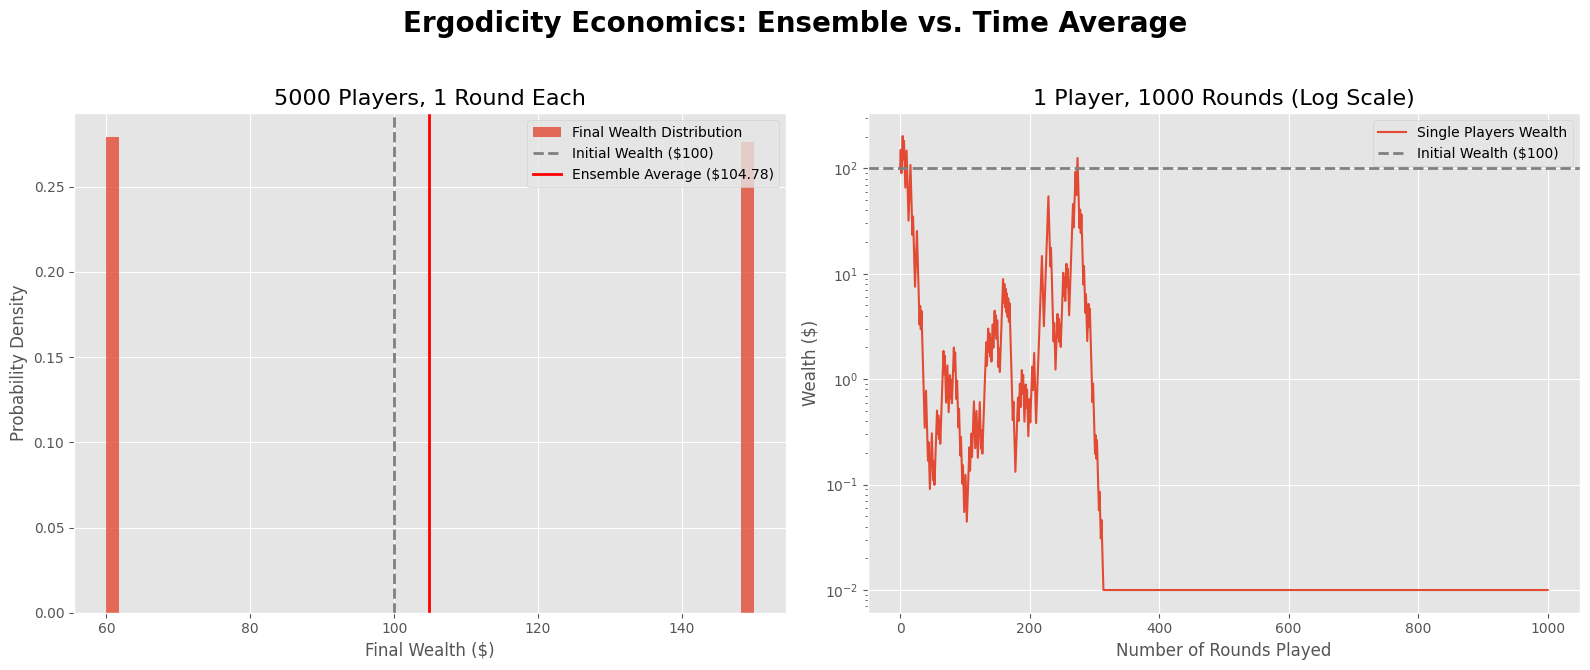

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Model Parameters ---
INITIAL_WEALTH = 100.0
PROB_WIN = 0.5
WIN_MULTIPLIER = 1.5  # You gain 50%
LOSS_MULTIPLIER = 0.6 # You lose 40%

N_PLAYERS_ENSEMBLE = 5000 # Number of people in the parallel universe
N_ROUNDS_TIME = 1000      # Number of rounds for a single player

# --- 1. Ensemble Simulation (Traditional Expected Value) ---
# Simulates N_PLAYERS_ENSEMBLE people playing the game just ONCE.
# This shows the "ensemble average" or "expected value" perspective.

print("--- Ensemble Simulation ---")
wealths = np.full(N_PLAYERS_ENSEMBLE, INITIAL_WEALTH)

# Generate random outcomes for all players at once
outcomes = np.random.rand(N_PLAYERS_ENSEMBLE)
winners = (outcomes < PROB_WIN)
losers = (outcomes >= PROB_WIN)

# Apply multipliers
wealths[winners] *= WIN_MULTIPLIER
wealths[losers] *= LOSS_MULTIPLIER

# Calculate and print the ensemble average
ensemble_average_wealth = np.mean(wealths)
print(f"Initial wealth: ${INITIAL_WEALTH:.2f}")
print(f"Average wealth after 1 round (ensemble): ${ensemble_average_wealth:.2f}")

# Calculate the simple "Expected Value"
expected_value = (PROB_WIN * (INITIAL_WEALTH * WIN_MULTIPLIER) +
                  (1 - PROB_WIN) * (INITIAL_WEALTH * LOSS_MULTIPLIER))
print(f"Calculated Expected Value: ${expected_value:.2f}")
print("Traditional economics says: TAKE THIS BET! (Expected value is > 100)")


# --- 2. Time Simulation (Ergodic Perspective) ---
# Simulates ONE person playing the game N_ROUNDS_TIME times.
# This shows the "time average" perspective.

print("\n--- Time Simulation ---")
wealth_trajectory = np.zeros(N_ROUNDS_TIME + 1)
wealth_trajectory[0] = INITIAL_WEALTH
current_wealth = INITIAL_WEALTH

for i in range(1, N_ROUNDS_TIME + 1):
    #Toss the coin
    if np.random.rand() < PROB_WIN:
        current_wealth *= WIN_MULTIPLIER
    else:
        current_wealth *= LOSS_MULTIPLIER

    wealth_trajectory[i] = current_wealth

    # Stop if player is effectively bankrupt
    if current_wealth < 0.01:
        wealth_trajectory[i:] = 0.01 # Set a floor to avoid log(0) issues
        break

final_time_wealth = wealth_trajectory[-1]
print(f"Initial wealth: ${INITIAL_WEALTH:.2f}")
print(f"Final wealth after {N_ROUNDS_TIME} rounds (time): ${final_time_wealth:.2f}")

# Calculate the "Time Average" (via geometric mean / log-utility)
# The expected log-change in wealth
log_utility = (PROB_WIN * np.log(WIN_MULTIPLIER) +
               (1 - PROB_WIN) * np.log(LOSS_MULTIPLIER))
print(f"Expected change in log-wealth per round: {log_utility:.4f}")
print("Ergodicity economics says: DON'T TAKE THIS BET! (Log-utility is negative)")


# --- 3. Visualization ---
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: Ensemble Histogram
ax1.hist(wealths, bins=50, alpha=0.8, density=True, label='Final Wealth Distribution')
ax1.axvline(INITIAL_WEALTH, color='gray', linestyle='--', linewidth=2,
            label=f'Initial Wealth (${INITIAL_WEALTH:.0f})')
ax1.axvline(ensemble_average_wealth, color='red', linestyle='-', linewidth=2,
            label=f'Ensemble Average (${ensemble_average_wealth:.2f})')
ax1.set_title(f'{N_PLAYERS_ENSEMBLE} Players, 1 Round Each', fontsize=16)
ax1.set_xlabel('Final Wealth ($)', fontsize=12)
ax1.set_ylabel('Probability Density', fontsize=12)
ax1.legend()

# Plot 2: Time Series Trajectory
ax2.plot(wealth_trajectory, label='Single Player''s Wealth')
ax2.axhline(INITIAL_WEALTH, color='gray', linestyle='--', linewidth=2,
            label=f'Initial Wealth (${INITIAL_WEALTH:.0f})')
ax2.set_title(f'1 Player, {N_ROUNDS_TIME} Rounds (Log Scale)', fontsize=16)
ax2.set_xlabel('Number of Rounds Played', fontsize=12)
ax2.set_ylabel('Wealth ($)', fontsize=12)
ax2.set_yscale('log') # Use a log scale! It's key for multiplicative processes.
ax2.legend()
ax2.tick_params(axis='y', which='both', labelleft=True)

fig.suptitle('Ergodicity Economics: Ensemble vs. Time Average', fontsize=20, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()